In [1]:
# Añadir texto a las leyendas y los ejes

# https://ourworldindata.org/renewables

# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# apertura de ficheros
hidro = pd.read_csv('hydropower-consumption.csv')
bio = pd.read_csv('biofuel-production.csv')
eolic = pd.read_csv('wind-energy-consumption-terawatt-hours-twh.csv')
solar = pd.read_csv('solar-energy-consumption.csv')

In [3]:
dfs = [hidro, bio, eolic, solar]
for df in dfs: 
    display(df.columns)
    # display(df.describe())
    # display(df.head(20))

Index(['Entity', 'Code', 'Year', 'Hydropower (Terawatt-hours)'], dtype='object')

Index(['Entity', 'Code', 'Year', 'Biofuels production (terrawatt-hours)'], dtype='object')

Index(['Entity', 'Code', 'Year', 'Wind energy consumption (Terawatt-hours)'], dtype='object')

Index(['Entity', 'Code', 'Year', 'Solar PV Consumption (Terawatt-hours)'], dtype='object')

In [4]:
# Como nos interesan los paises y no las regiones (continentes) vamos a eliminar 
# todos los registros que no tengan Code
dfs = [hidro, bio, eolic, solar]

for i, df in enumerate(dfs): 
    dfs[i] = dfs[i].dropna()
    display(dfs[i].describe())

,Year,Hydropower (Terawatt-hours)
count,3396.000000,3396.000000
mean,1991.159600,66.355595
std,14.907782,303.050654
min,1965.000000,0.000000
25%,1978.000000,0.697631
50%,1992.000000,6.138547
75%,2004.000000,27.992798
max,2016.000000,4022.937769


,Year,Biofuels production (terrawatt-hours)
count,675.000000,675.000000
mean,2003.000000,293.513087
std,7.794657,1061.223100
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,11.593154
75%,2010.000000,77.848722
max,2016.000000,9572.244522


,Year,Wind energy consumption (Terawatt-hours)
count,3396.000000,3396.000000
mean,1991.159600,3.349144
std,14.907782,33.083002
min,1965.000000,0.000000
25%,1978.000000,0.000000
50%,1992.000000,0.000000
75%,2004.000000,0.016000
max,2016.000000,959.529506


,Year,Solar PV Consumption (Terawatt-hours)
count,3396.000000,3396.000000
mean,1991.159600,0.696112
std,14.907782,9.027918
min,1965.000000,0.000000
25%,1978.000000,0.000000
50%,1992.000000,0.000000
75%,2004.000000,0.001000
max,2016.000000,333.052493


In [5]:
df1 = dfs[0].merge(dfs[1],  how='outer', left_on=['Code','Year'], right_on = ['Code','Year'])
# df1.drop('Entity_y', axis=1, inplace=True)
df1.drop('Entity_y', axis=1, inplace=True)
df1.head()

,Entity_x,Code,Year,Hydropower (Terawatt-hours),Biofuels production (terrawatt-hours)
0,Algeria,DZA,1965,0.393327,NaN
1,Algeria,DZA,1966,0.362391,NaN
2,Algeria,DZA,1967,0.406585,NaN
3,Algeria,DZA,1968,0.556844,NaN
4,Algeria,DZA,1969,0.362391,NaN


In [6]:
df1 = df1.merge(dfs[2],  how='outer', left_on=['Code','Year'], right_on = ['Code','Year'])
df1.drop('Entity', axis=1, inplace=True)
df1.head()

,Entity_x,Code,Year,Hydropower (Terawatt-hours),Biofuels production (terrawatt-hours),Wind energy consumption (Terawatt-hours)
0,Algeria,DZA,1965,0.393327,NaN,0.0
1,Algeria,DZA,1966,0.362391,NaN,0.0
2,Algeria,DZA,1967,0.406585,NaN,0.0
3,Algeria,DZA,1968,0.556844,NaN,0.0
4,Algeria,DZA,1969,0.362391,NaN,0.0


In [7]:
df = df1.merge(dfs[3],  how='outer', left_on=['Code','Year'], right_on = ['Code','Year'])
df.drop('Entity', axis=1, inplace=True)
df1.head()

,Entity_x,Code,Year,Hydropower (Terawatt-hours),Biofuels production (terrawatt-hours),Wind energy consumption (Terawatt-hours)
0,Algeria,DZA,1965,0.393327,NaN,0.0
1,Algeria,DZA,1966,0.362391,NaN,0.0
2,Algeria,DZA,1967,0.406585,NaN,0.0
3,Algeria,DZA,1968,0.556844,NaN,0.0
4,Algeria,DZA,1969,0.362391,NaN,0.0


In [8]:
# En nuestro caso un valor de NaN en cualquiera de las columnas numéricas significa que
# no hay consumo de ese tipo de energía. 

# Por lo que tiene sentido ponerlo a 0. Pero eso vamos a estudiarlo más adelante

In [9]:
# correlaciones
df.columns

Index(['Entity_x', 'Code', 'Year', 'Hydropower (Terawatt-hours)',
       'Biofuels production (terrawatt-hours)',
       'Wind energy consumption (Terawatt-hours)',
       'Solar PV Consumption (Terawatt-hours)'],
      dtype='object')

In [10]:
# Renombramos columnas
df = df.rename(columns={"Entity_x": "Country", 
                       'Hydropower (Terawatt-hours)': 'Hydropower', 
                       'Biofuels production (terrawatt-hours)' : 'Biopower', 
                       'Wind energy consumption (Terawatt-hours)': 'Windpower', 
                       'Solar PV Consumption (Terawatt-hours)': 'Solarpower'})
df.head()

,Country,Code,Year,Hydropower,Biopower,Windpower,Solarpower
0,Algeria,DZA,1965,0.393327,NaN,0.0,0.0
1,Algeria,DZA,1966,0.362391,NaN,0.0,0.0
2,Algeria,DZA,1967,0.406585,NaN,0.0,0.0
3,Algeria,DZA,1968,0.556844,NaN,0.0,0.0
4,Algeria,DZA,1969,0.362391,NaN,0.0,0.0


In [11]:
# hay que filtrar los registros cuyo code no sea un string de 3 letras

def code_ok(s): 
    res = False
    if len(s) == 3: 
        res = True
    return res

df_country = df[df.apply(lambda x: code_ok(x['Code']), axis=1)]
df_country.head(10)


,Country,Code,Year,Hydropower,Biopower,Windpower,Solarpower
0,Algeria,DZA,1965,0.393327,NaN,0.0,0.0
1,Algeria,DZA,1966,0.362391,NaN,0.0,0.0
2,Algeria,DZA,1967,0.406585,NaN,0.0,0.0
3,Algeria,DZA,1968,0.556844,NaN,0.0,0.0
4,Algeria,DZA,1969,0.362391,NaN,0.0,0.0
5,Algeria,DZA,1970,0.583361,NaN,0.0,0.0
6,Algeria,DZA,1971,0.327036,NaN,0.0,0.0
7,Algeria,DZA,1972,0.499392,NaN,0.0,0.0
8,Algeria,DZA,1973,0.755717,NaN,0.0,0.0
9,Algeria,DZA,1974,0.499392,NaN,0.0,0.0


In [12]:
df.iloc[1490: 1500, :]

,Country,Code,Year,Hydropower,Biopower,Windpower,Solarpower
1490,Italy,ITA,1987,39.505,NaN,0.000000,0.00000
1491,Italy,ITA,1988,40.676,NaN,0.000000,0.00000
1492,Italy,ITA,1989,34.057,NaN,0.002000,0.00202
1493,Italy,ITA,1990,31.626,0.0,0.001919,0.00400
1494,Italy,ITA,1991,42.239,0.0,0.002879,0.00500
1495,Italy,ITA,1992,42.200,0.0,0.001919,0.00900
1496,Italy,ITA,1993,41.425,0.0,0.003838,0.01100
1497,Italy,ITA,1994,44.658,0.0,0.006717,0.01100
1498,Italy,ITA,1995,37.782,0.0,0.008636,0.01300
1499,Italy,ITA,1996,42.037,0.0,0.031667,0.01400


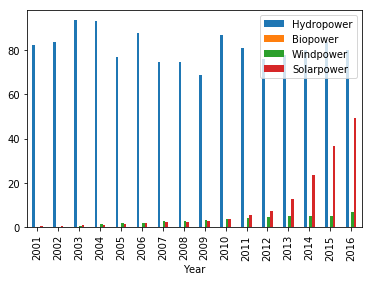

In [13]:
# Nos quedamos con un pais solo para nuestros ejemplos

df_jpn = df_country[(df_country['Code'] == 'JPN') & (df_country['Year'] > 2000)]

df_mean = df_jpn[["Hydropower", 
                   "Biopower", 
                   "Windpower", 
                   'Solarpower', 'Year']].groupby(["Year"]).agg("max")
df_mean.plot.bar()

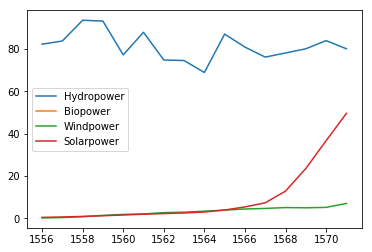

In [14]:
df_jpn[['Hydropower', 
        'Biopower', 
        'Windpower', 
        'Solarpower']].plot()

In [15]:
# generación de energía agrupado por año: 
df_y = df.groupby('Year').agg('sum')
df_y.tail()

,Hydropower,Biopower,Windpower,Solarpower
Year,,,,
2012,7013.437522,15232.321499,1049.340286,198.954775
2013,7223.898546,16469.215534,1282.308184,273.603605
2014,7411.165165,18090.472819,1409.251863,390.660428
2015,7452.725465,18138.440833,1642.623111,509.255958
2016,7681.987905,18671.360434,1903.344041,661.368433


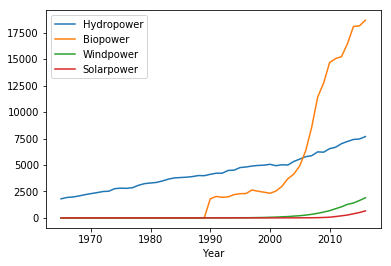

In [16]:
df_y.plot()

In [17]:
# Parece que solar y eólica van casi parejas. veamos si hay correlación
df_y.corr()

,Hydropower,Biopower,Windpower,Solarpower
Hydropower,1.000000,0.885294,0.785919,0.645917
Biopower,0.885294,1.000000,0.943937,0.801800
Windpower,0.785919,0.943937,1.000000,0.947733
Solarpower,0.645917,0.801800,0.947733,1.000000


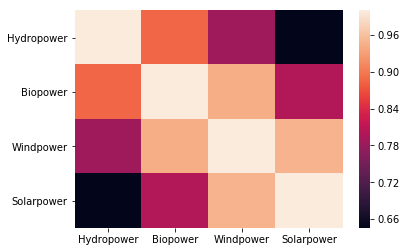

In [18]:
ax = sns.heatmap(df_y.corr())

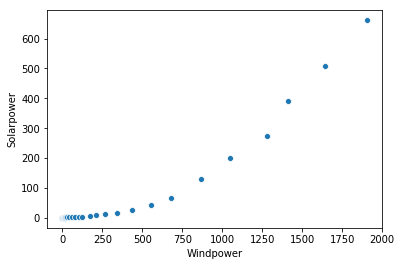

In [19]:
ax = sns.scatterplot(x="Windpower", 
                     y="Solarpower", 
                     data=df_y, 
                    legend="full")


In [20]:
df_jpn.tail()

,Country,Code,Year,Hydropower,Biopower,Windpower,Solarpower
1567,Japan,JPN,2012,76.056990,NaN,4.727417,7.371903
1568,Japan,JPN,2013,78.003571,NaN,5.133169,12.908782
1569,Japan,JPN,2014,79.972578,NaN,5.013972,23.548166
1570,Japan,JPN,2015,83.840116,NaN,5.222807,36.649620
1571,Japan,JPN,2016,79.986342,NaN,7.074058,49.534064


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7afd6e9828>,
      dtype=object)

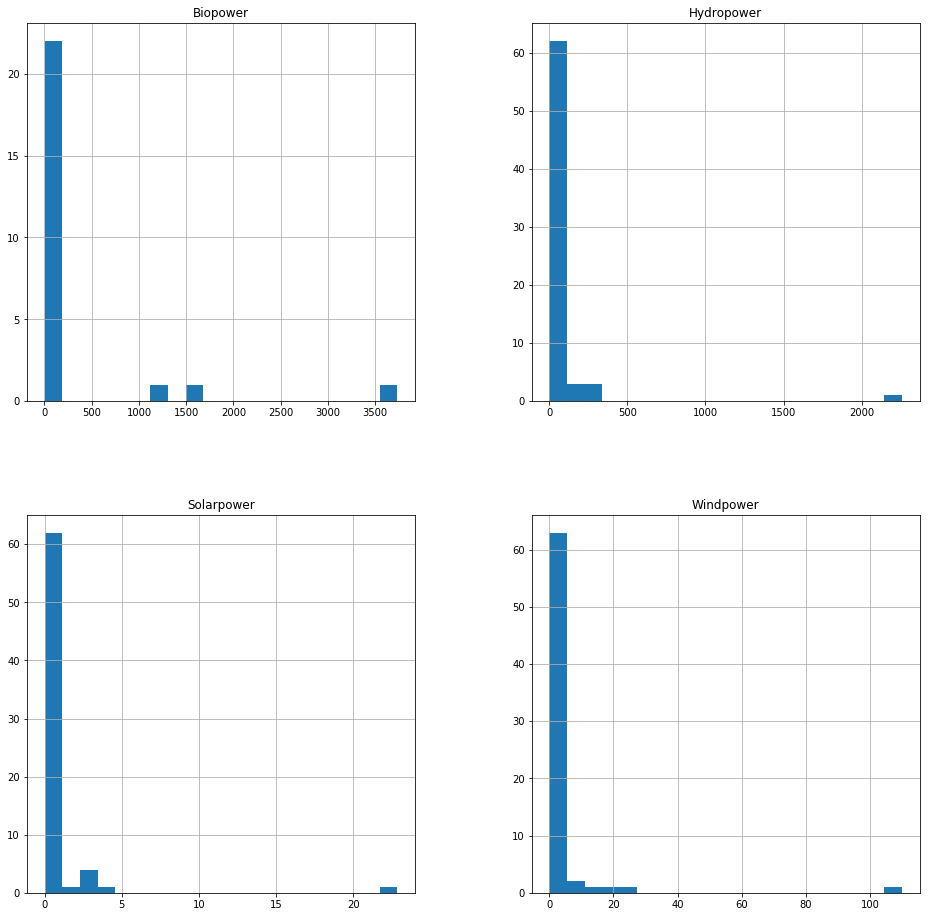

In [21]:
'''
At least 3 histograms on different aggregated data. Do an analysis on which is 
the optimal bin parameter (the one that maximizes clarity on specified insight). 
Keep an eye on the dataset you choose, it must have at least 3 numeric columns 
to operate.

Hydropower
Biopower',
Windpower'
Solarpower
'''
df_countries = df[["Windpower", "Solarpower", 'Biopower', 'Hydropower', 'Country']].groupby('Country').agg('mean')
df_countries.hist(bins=20, figsize=(16, 16))
# hay que eliminar los outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7afcf95c88>,
      dtype=object)

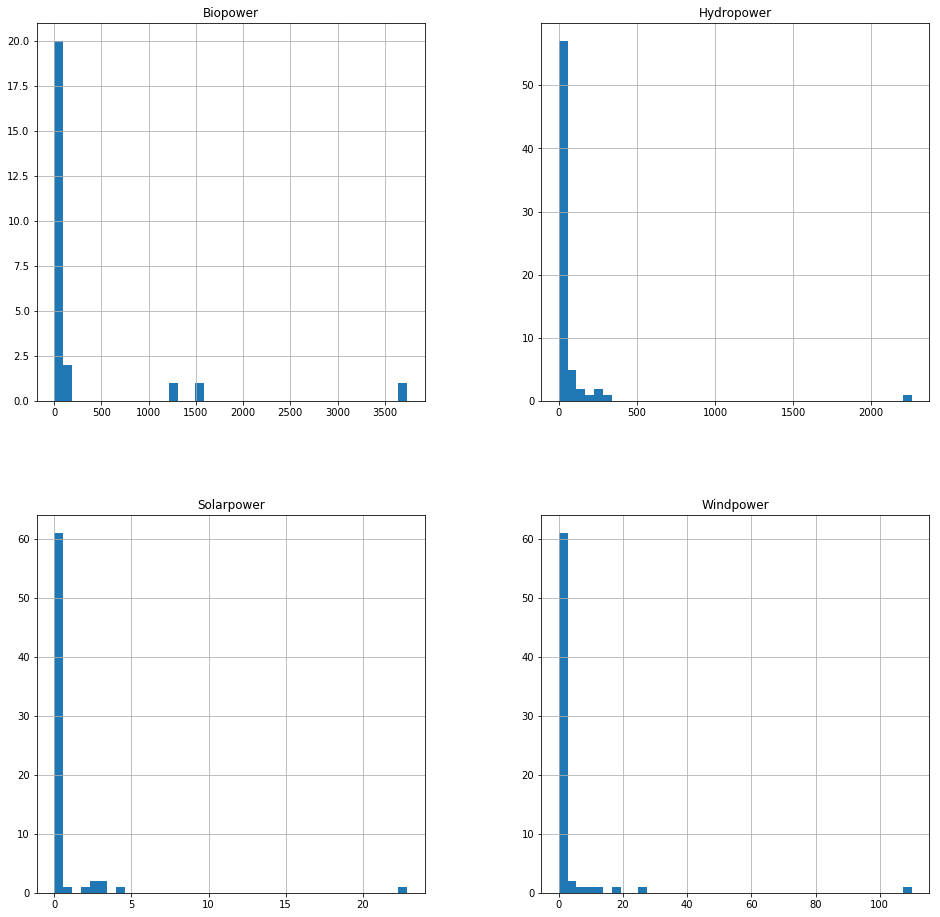

In [22]:
df_countries.hist(bins=40, figsize=(16, 16))

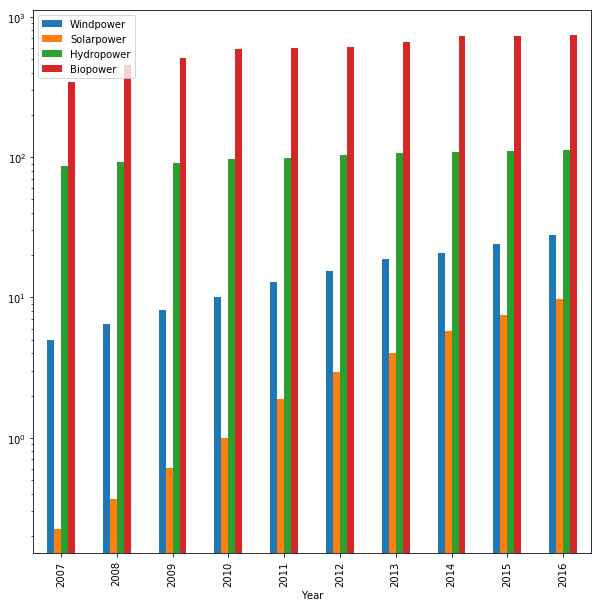

In [23]:
#  scaterplot con 2 variables desde el año 2000
dfz = df[df['Year']>2006]

dfz = dfz[["Windpower", 
           "Solarpower", 
           'Hydropower', 
           'Biopower', 
           "Year"]].groupby(["Year"]).agg("mean")

dfz.plot.bar(logy=True, figsize=(10, 10))

In [24]:
# sns.set(style="ticks")
# g = sns.catplot(data=df_jpn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7afd134518>,
      dtype=object)

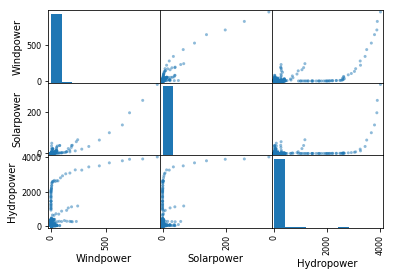

In [25]:
pd.plotting.scatter_matrix(df[["Windpower", "Solarpower", 'Hydropower']])

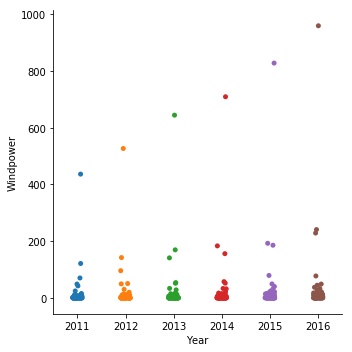

In [26]:
# df_violin = dfz[["Windpower", "Solarpower", 'Hydropower', 'Country', 'Year']]
# g = sns.catplot(x="Year", y="Solarpower", hue="Solarpower", data=df_violin, kind="violin")
dfz = df[df['Year']>2010]
g = sns.catplot(x="Year", y="Windpower", hue="Year", data=dfz)